# Importing Libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Load the Dataset

In [15]:
file_path = r'C:\Users\Ashish\Desktop\Analysis_project\cleaned_dataset_1.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

df['Year'] = pd.to_datetime(df['Date']).dt.year 

# Step 1: Define target and predictors

In [16]:
target = 'Simpson_Diversity_Index'  # Target variable
predictors = [col for col in df.columns if col not in [target, 'Site_Code', 'Date', 'Time', 'Sampling_Distance', 'Latitude', 'Longitude',
                                                      'Sampling_Time_Sec', 'Sampling_Time_Min', 'Lakes', 'Headwater_Status', 'Worms']+ ['Headwater_status', 'EOT']]  # Exclude irrelevant columns


# Step 2: Encode categorical variables

In [17]:
categorical_vars = ['Lakes', 'Headwater_status']
label_encoders = {}

for col in categorical_vars:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 3: Normalize/standardize numerical features

In [18]:
scaler = StandardScaler()
numerical_vars = [col for col in predictors if df[col].dtype in ['float64', 'int64']]
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

# Step 4: Split data into training and testing sets

In [19]:
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest model

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Step 6: Evaluate the model

In [21]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 0.76
Mean Absolute Error: 0.06


In [22]:
# Feature Importance (Optional)
feature_importances = pd.DataFrame({
    'Feature': predictors,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
              Feature  Importance
5        Biotic_Index    0.491489
7        Malacostraca    0.165138
9               Other    0.160209
6             Diptera    0.052599
0   Water_Temperature    0.036670
2        Conductivity    0.029799
3                  pH    0.022276
1              DO_mgl    0.016312
8            Mollusca    0.014222
10               Year    0.008465
4           Max_Depth    0.002821


# Visualizing the results

C:\Users\Ashish\AppData\Local\Temp\ipykernel_15356\4037119632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


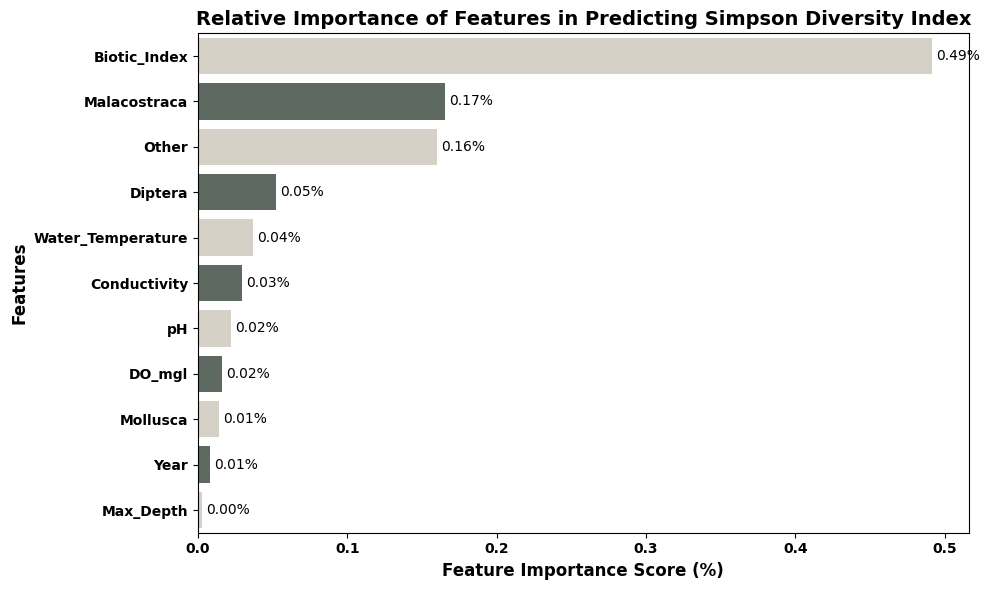

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


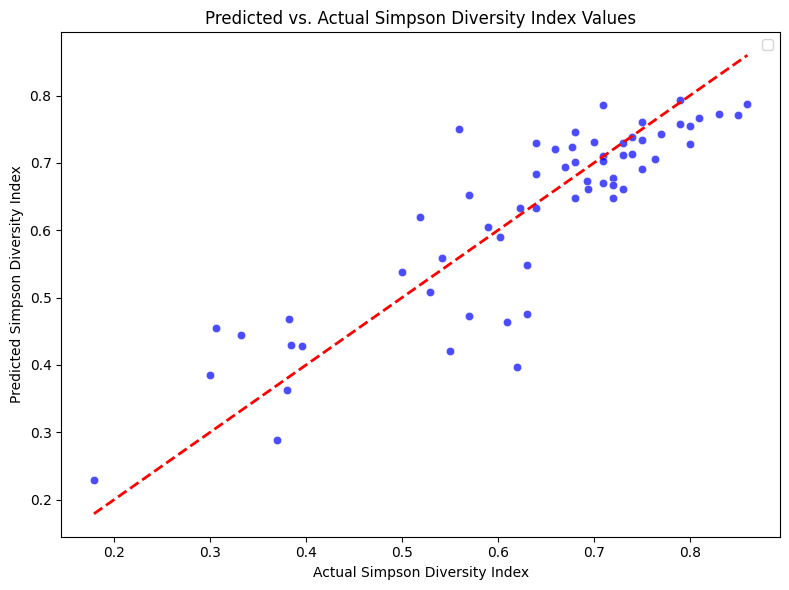

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'feature_importances' is a DataFrame with columns 'Feature' and 'Importance'
# Define a custom palette with alternating beige and grayish color
custom_palette = ['#d8d2c4' if i % 2 == 0 else '#5c6b61' for i in range(len(feature_importances))]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances, 
    palette=custom_palette
)

# Adding labels to the bars (in percentages)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3)

# Customize axes titles and labels
plt.title('Relative Importance of Features in Predicting Simpson Diversity Index', fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance Score (%)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')

# Bold the tick labels
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



# Predicted vs Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Predicted vs. Actual Simpson Diversity Index Values')
plt.xlabel('Actual Simpson Diversity Index')
plt.ylabel('Predicted Simpson Diversity Index')
plt.legend()
plt.tight_layout()
plt.show()


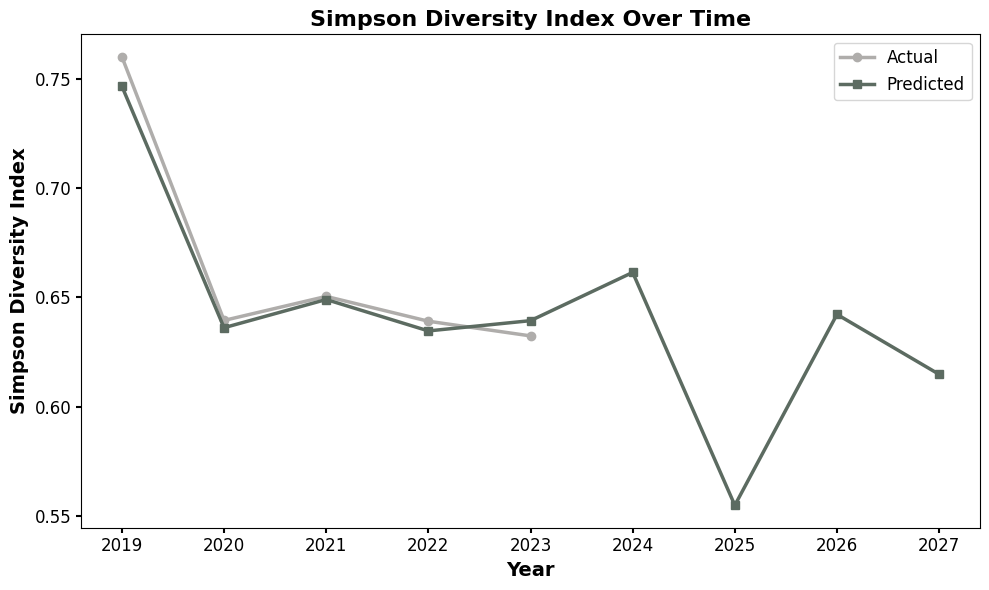

In [32]:
df['Predicted_Simpson'] = model.predict(X)  # Predict for entire dataset
df_grouped = df.groupby('Year')[['Simpson_Diversity_Index', 'Predicted_Simpson']].mean().reset_index()

# Filter data for the actual line to only include years up to 2023
# Filter data for the actual line to only include years up to 2023
df_actual_filtered = df_grouped[df_grouped['Year'] <= 2023]

# Visualization of Simpson Index Over Time
plt.figure(figsize=(10, 6))

# Plot the Actual Simpson Diversity Index (limited to 2023)
plt.plot(df_actual_filtered['Year'], 
         df_actual_filtered['Simpson_Diversity_Index'], 
         label='Actual', 
         marker='o', 
         linestyle='-', 
         color='#afadab', 
         linewidth=2.5)  # Thicker line

# Plot the Predicted Simpson Diversity Index (goes till 2027)
plt.plot(df_grouped['Year'], 
         df_grouped['Predicted_Simpson'], 
         label='Predicted', 
         marker='s', 
         linestyle='--', 
         color='#5c6b61', 
         linewidth=2.5)  # Thicker line

# Customizing title and axis labels
plt.title('Simpson Diversity Index Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Simpson Diversity Index', fontsize=14, fontweight='bold')

# Customizing tick parameters for axis values
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='major', labelcolor='black', width=1.5)

# Adding legend and layout adjustments
plt.legend(fontsize=12, loc='upper left')  # Adjust legend font size and position
plt.tight_layout()
plt.show()



# How the Model Predicted the Values
### The Random Forest model uses:
### Feature Importance: Determines which features (e.g., Biotic_Index, Malacostraca, etc.) have the most predictive power.
### Ensemble of Decision Trees: Aggregates predictions from multiple decision trees to make a final prediction for the Simpson_Diversity_Index.
### The scatter plot will show if predictions are close to actual values. Points on the diagonal line (perfect prediction line) indicate accurate predictions.

# Relation Malacostraca and Simpsons_diversity_index

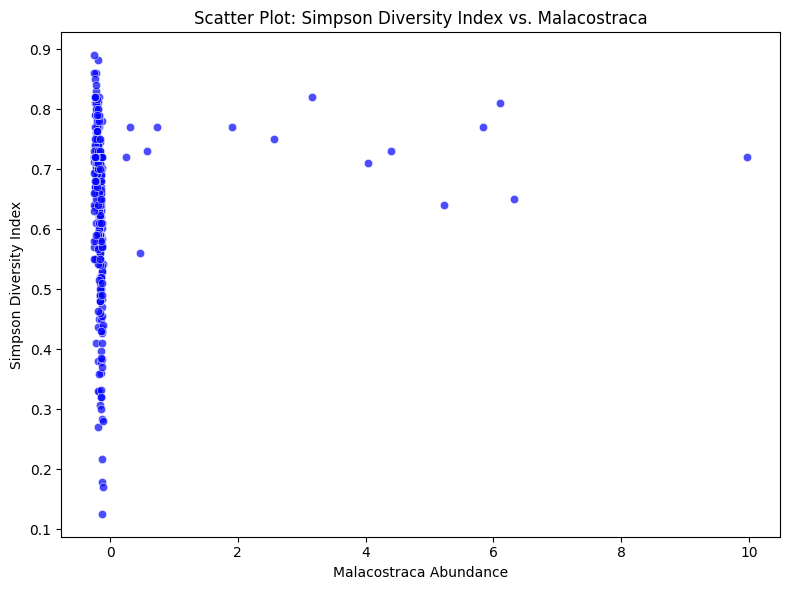

KeyError: 'Malacostraca_Bin'

In [11]:
# Scatter Plot: Simpson Diversity Index vs. Malacostraca
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Malacostraca'], y=df['Simpson_Diversity_Index'], alpha=0.7, color='blue')
plt.title('Scatter Plot: Simpson Diversity Index vs. Malacostraca')
plt.xlabel('Malacostraca Abundance')
plt.ylabel('Simpson Diversity Index')
plt.tight_layout()
plt.show()
#Reveals whether there’s a linear or non-linear relationship between Simpson_Diversity_Index and Biotic_Index.

# Line Plot: Aggregated Mean Values
aggregated_data = df.groupby('Malacostraca_Bin')['Simpson_Diversity_Index'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x=aggregated_data.index, y=aggregated_data['Simpson_Diversity_Index'], marker='o', color='green')
plt.title('Line Plot: Mean Simpson Diversity Index vs. Binned Malacostraca')
plt.xlabel('Binned Malacostraca Abundance (Index)')
plt.ylabel('Mean Simpson Diversity Index')
plt.tight_layout()
plt.show()
#Provides an aggregated trend, showing how the mean Simpson_Diversity_Index changes with increasing values of Biotic_Index.


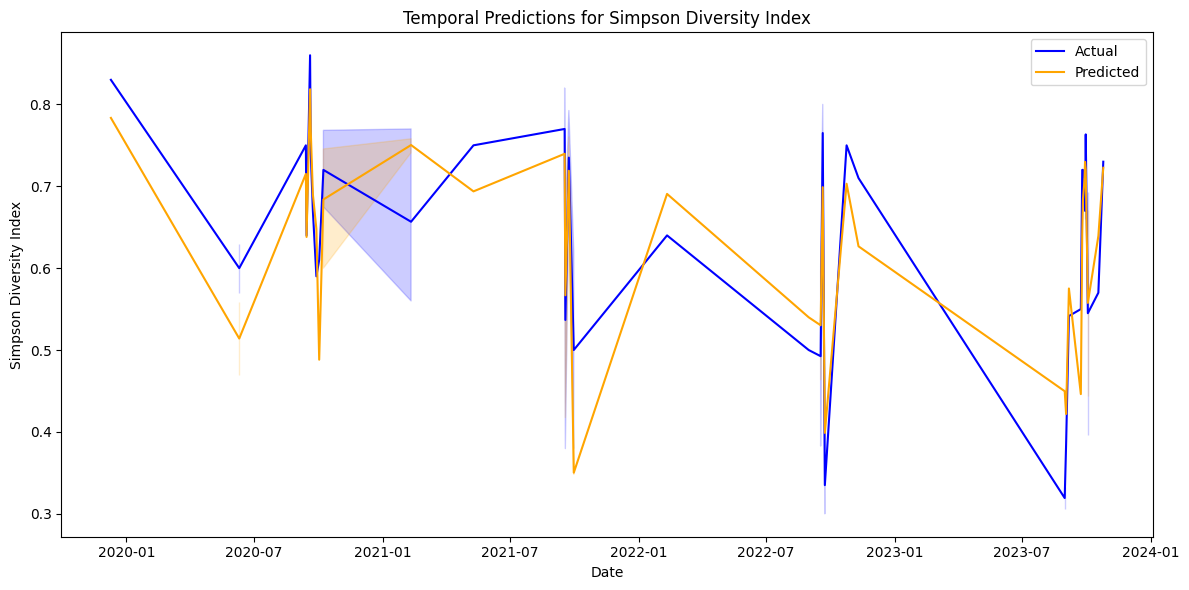

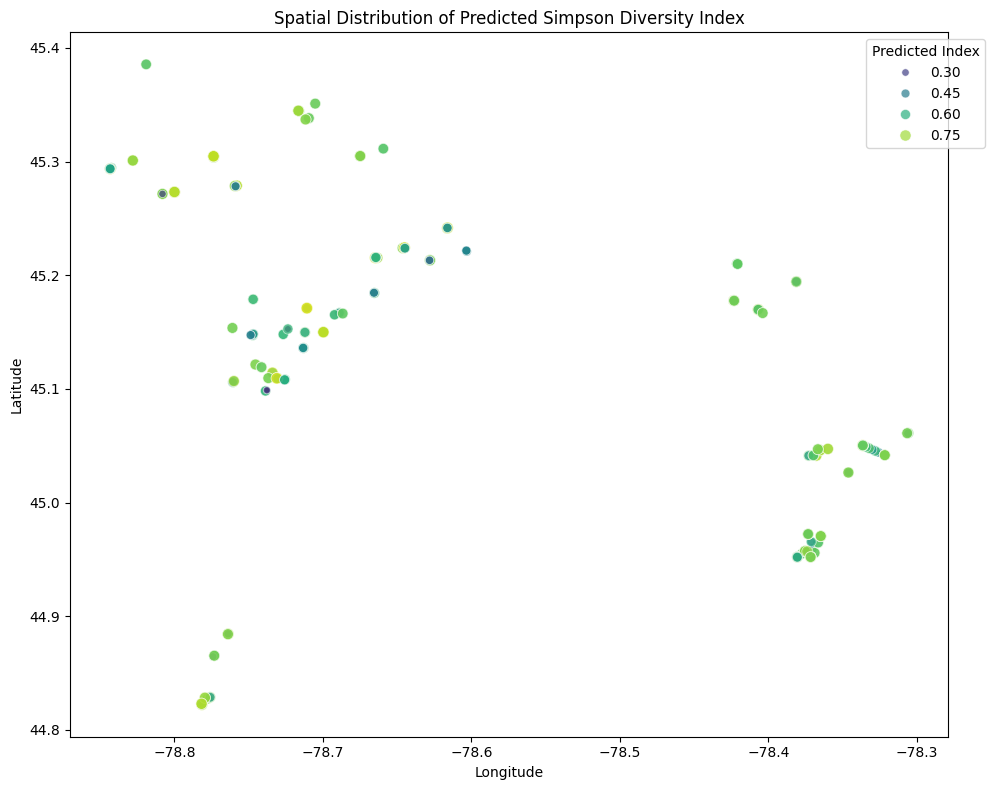

In [12]:
# Temporal Analysis: Visualizing Predictions Over Time
# Adding predictions to the test dataset for temporal plotting
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred
test_results['Date'] = df.loc[test_results.index, 'Date']

# Sort by Date for proper temporal visualization
test_results = test_results.sort_values(by='Date')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Actual', data=test_results, label='Actual', color='blue')
sns.lineplot(x='Date', y='Predicted', data=test_results, label='Predicted', color='orange')
plt.title('Temporal Predictions for Simpson Diversity Index')
plt.xlabel('Date')
plt.ylabel('Simpson Diversity Index')
plt.legend()
plt.tight_layout()
plt.show()

# Spatial Analysis: Mapping Predicted Values to Lake Locations
# Aggregate predictions by location (Latitude, Longitude)
spatial_results = df.copy()
spatial_results['Predicted'] = model.predict(df[predictors])

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Longitude', y='Latitude', size='Predicted', hue='Predicted',
    data=spatial_results, palette='viridis', legend=True, alpha=0.7
)
plt.title('Spatial Distribution of Predicted Simpson Diversity Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Predicted Index', loc='best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


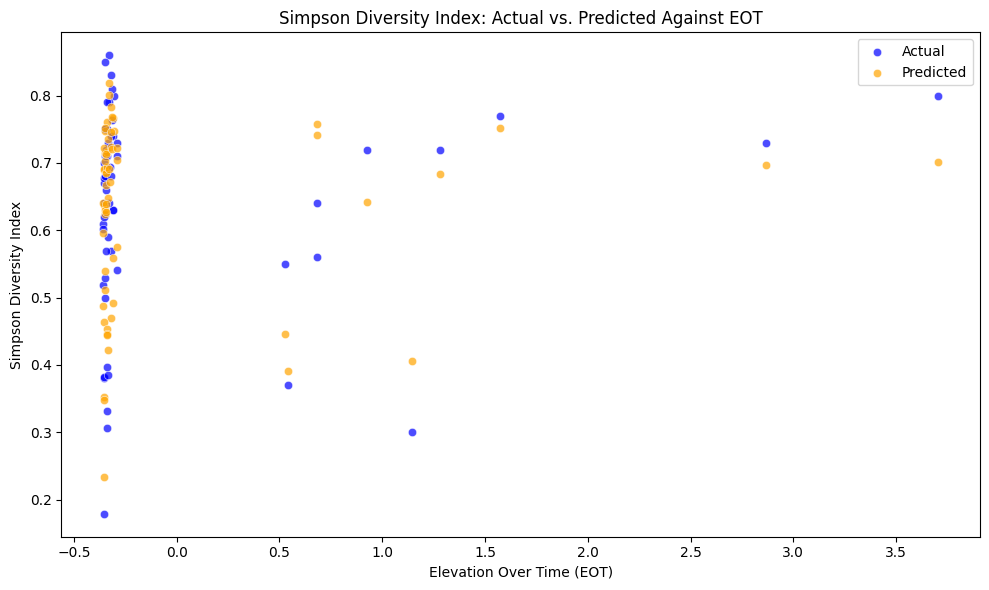

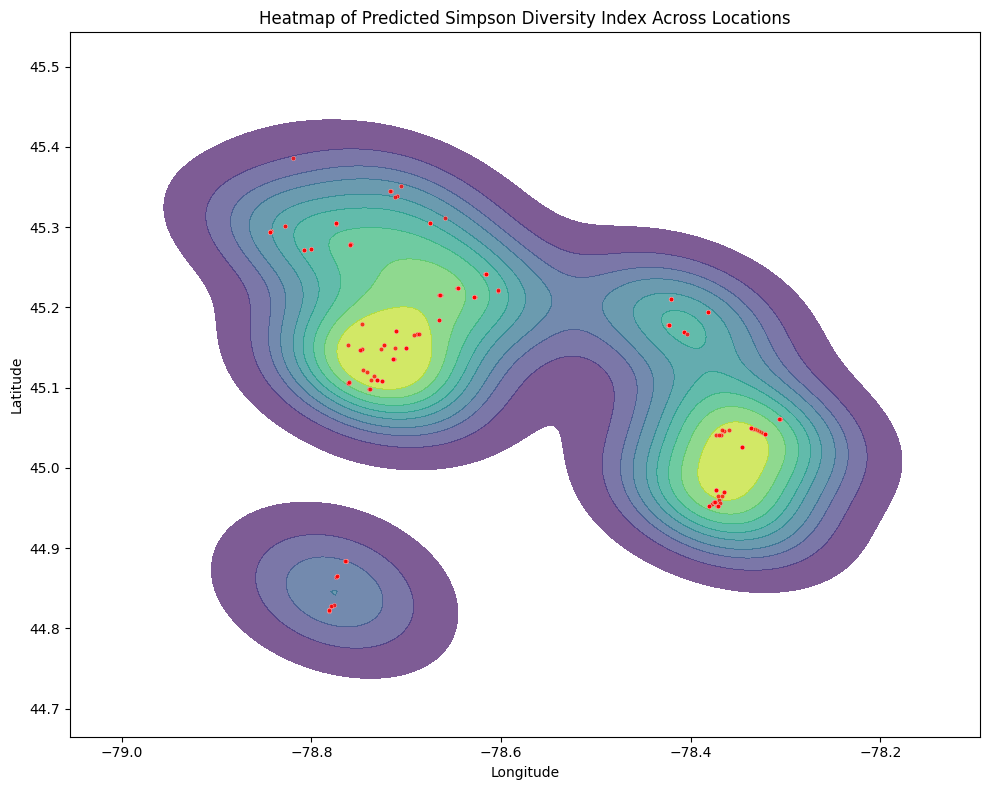

In [13]:
# Ensure EOT or similar variable exists in the dataset for analysis
if 'EOT' in df.columns:
    # Temporal Analysis Against EOT
    test_results['EOT'] = df.loc[test_results.index, 'EOT']

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='EOT', y='Actual', data=test_results, label='Actual', color='blue', alpha=0.7)
    sns.scatterplot(x='EOT', y='Predicted', data=test_results, label='Predicted', color='orange', alpha=0.7)
    plt.title('Simpson Diversity Index: Actual vs. Predicted Against EOT')
    plt.xlabel('Elevation Over Time (EOT)')
    plt.ylabel('Simpson Diversity Index')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Spatial Analysis: Heatmap of Predictions
    plt.figure(figsize=(10, 8))
    sns.kdeplot(
        x='Longitude', y='Latitude', weights=spatial_results['Predicted'],
        data=spatial_results, fill=True, cmap='viridis', alpha=0.7, thresh=0.05
    )
    sns.scatterplot(x='Longitude', y='Latitude', data=spatial_results, color='red', s=10, alpha=0.5)
    plt.title('Heatmap of Predicted Simpson Diversity Index Across Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()
else:
    print("EOT variable not found in the dataset. Please ensure it is included for analysis.")
